In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, Column, Integer, String, Float, Date
from sqlalchemy.orm import declarative_base, sessionmaker
from dotenv import load_dotenv
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
load_dotenv()

USER = os.getenv("DB_USER")
PASSWORD = os.getenv("DB_PASSWORD")
HOST = os.getenv("DB_HOST")
DATABASE = os.getenv("DB")

engine = create_engine(f"mysql+pymysql://{USER}:{PASSWORD}@{HOST}/{DATABASE}")

query = "SELECT * FROM accidents"
df = pd.read_sql(query, engine)

df.head(10)

,id,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,1,2023-07-29 13:00:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,...,NO INDICATION OF INJURY,0,0,0,0,0,3,13,7,7
1,2,2023-08-13 00:11:00,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0,0,0,0,0,2,0,1,8
2,3,2021-12-09 10:30:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0,0,0,0,0,3,10,5,12
3,4,2023-08-09 19:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NONINCAPACITATING INJURY,5,0,0,5,0,0,19,4,8
4,5,2023-08-19 14:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,...,NO INDICATION OF INJURY,0,0,0,0,0,3,14,7,8
5,6,2023-09-06 00:59:00,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,WET,UNKNOWN,...,NONINCAPACITATING INJURY,2,0,0,2,0,0,0,4,9
6,7,2022-12-20 11:45:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR TO FRONT,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0,0,0,0,0,2,11,3,12
7,8,2023-09-20 14:38:00,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),"CURVE, LEVEL",DRY,NO DEFECTS,...,NONINCAPACITATING INJURY,1,0,0,1,0,1,14,4,9
8,9,2018-06-04 18:42:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0,0,0,0,0,3,18,2,6
9,10,2023-09-07 17:30:00,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0,0,0,0,0,4,17,5,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   id                             209306 non-null  int64         
 1   crash_date                     209306 non-null  datetime64[ns]
 2   traffic_control_device         209306 non-null  object        
 3   weather_condition              209306 non-null  object        
 4   lighting_condition             209306 non-null  object        
 5   first_crash_type               209306 non-null  object        
 6   trafficway_type                209306 non-null  object        
 7   alignment                      209306 non-null  object        
 8   roadway_surface_cond           209306 non-null  object        
 9   road_defect                    209306 non-null  object        
 10  crash_type                     209306 non-null  object        
 11  

In [6]:
df.describe()

,id,crash_date,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,104653.500000,2020-12-08 23:26:35.213802240,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
min,1.000000,2013-03-03 16:48:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,52327.250000,2018-12-03 10:18:45,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,104653.500000,2020-12-19 16:39:00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,156979.750000,2023-01-08 02:33:45,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,209306.000000,2025-01-18 00:17:00,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000
std,60421.582059,NaN,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593


In [7]:
df.isnull().sum()

id                               0
crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:

for col in df.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df[col].nunique()} valores únicos")
    print(df[col].value_counts().head(5), "\n")


traffic_control_device: 19 valores únicos
traffic_control_device
TRAFFIC SIGNAL       123944
STOP SIGN/FLASHER     49139
NO CONTROLS           29508
UNKNOWN                4455
OTHER                   670
Name: count, dtype: int64 

weather_condition: 12 valores únicos
weather_condition
CLEAR              164700
RAIN                21703
CLOUDY/OVERCAST      7533
SNOW                 6871
UNKNOWN              6534
Name: count, dtype: int64 

lighting_condition: 6 valores únicos
lighting_condition
DAYLIGHT                  134109
DARKNESS, LIGHTED ROAD     53378
DARKNESS                    7436
DUSK                        6323
UNKNOWN                     4336
Name: count, dtype: int64 

first_crash_type: 18 valores únicos
first_crash_type
TURNING                     64157
ANGLE                       52250
REAR END                    42018
SIDESWIPE SAME DIRECTION    20116
PEDESTRIAN                   8996
Name: count, dtype: int64 

trafficway_type: 20 valores únicos
trafficway_type
NOT

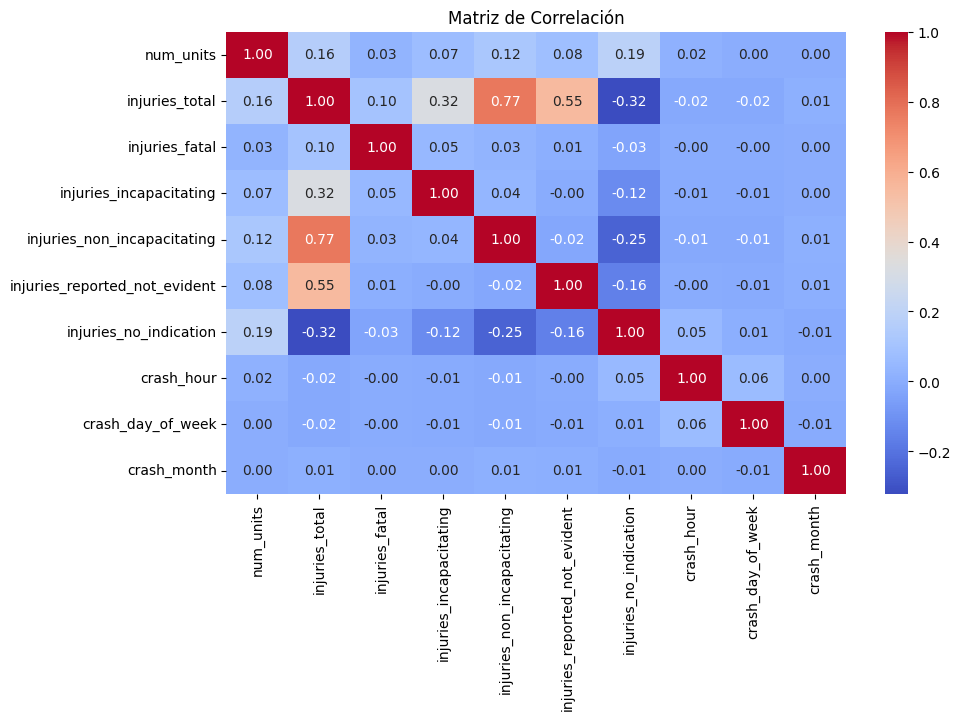

In [10]:
df_numeric = df.select_dtypes(include=["number"]).drop(columns=["id"], errors="ignore")

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()





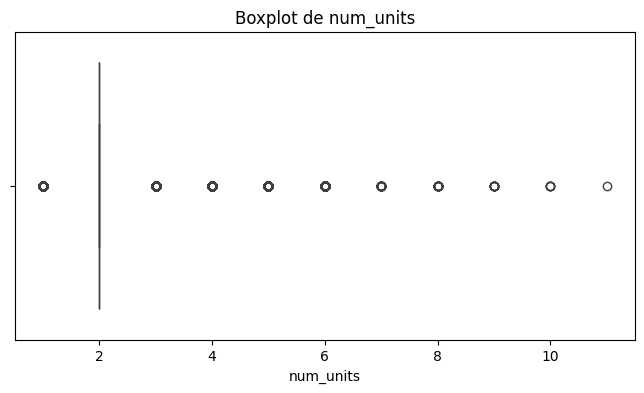

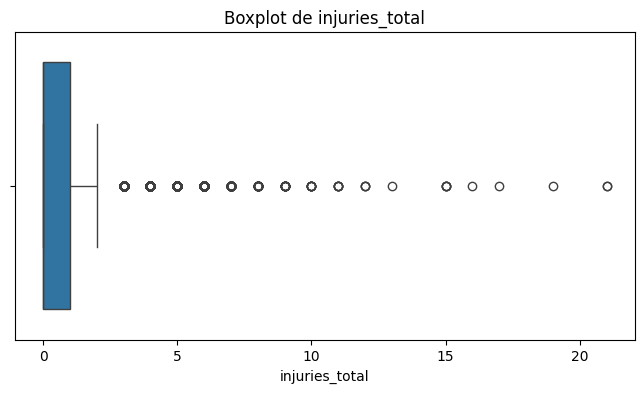

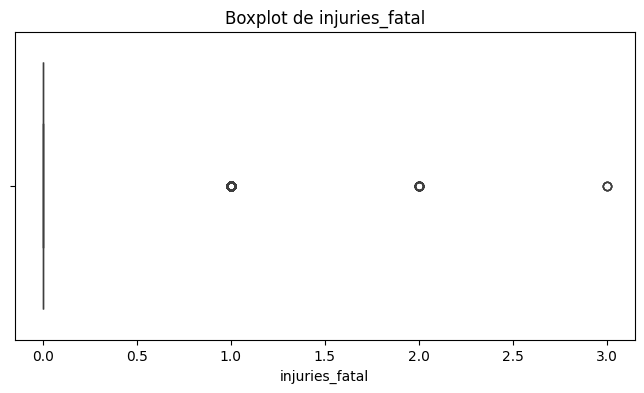

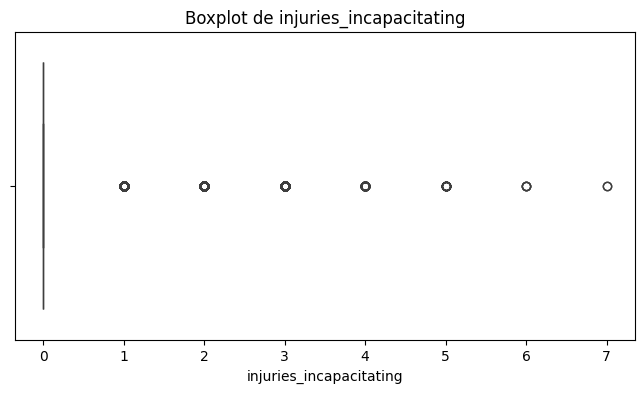

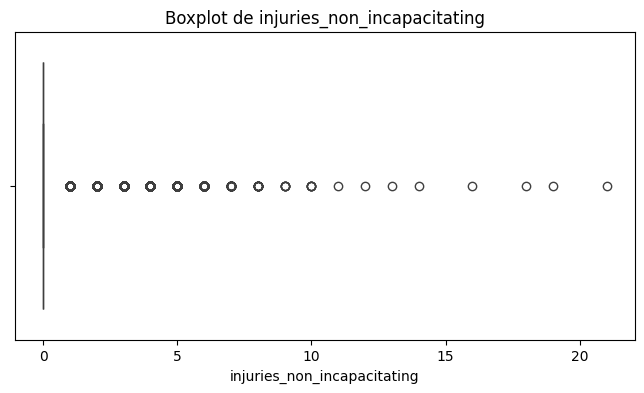

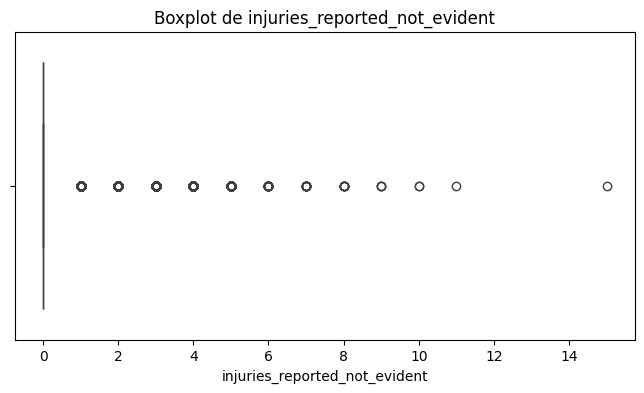

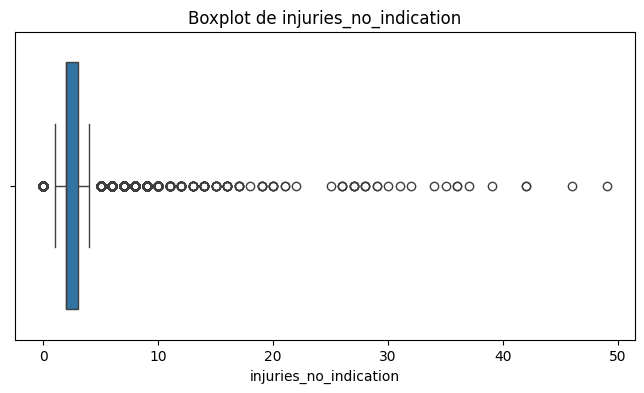

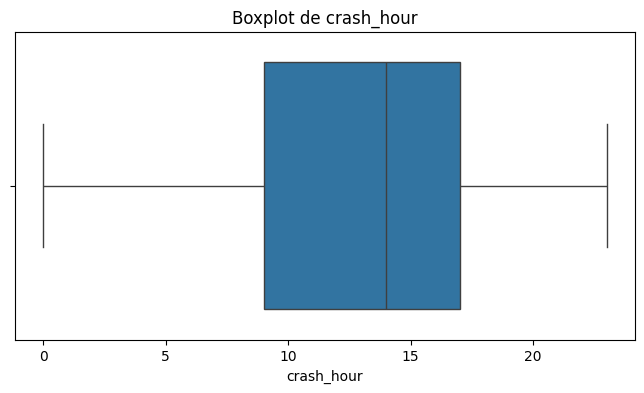

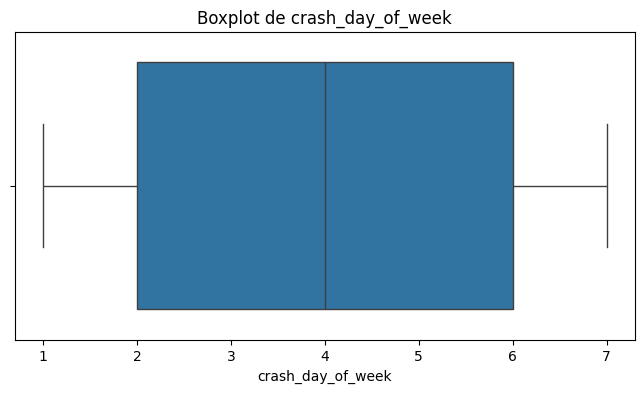

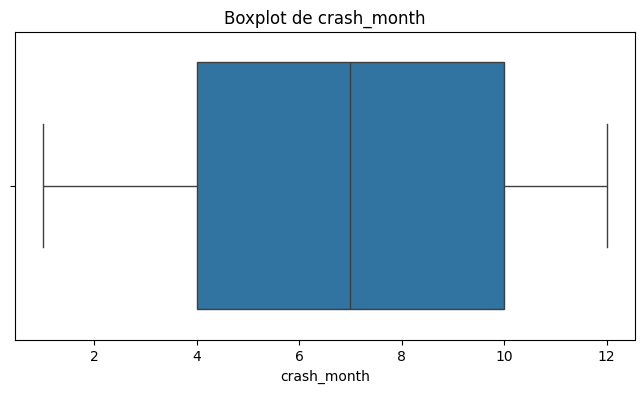

In [11]:
for col in df.select_dtypes(include=["int64", "float64"]).columns.drop("id", errors="ignore"):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


In [12]:

df["crash_year"] = pd.to_datetime(df["crash_date"], format="%m/%d/%Y %I:%M:%S %p").dt.year
df["crash_day_of_month"] = pd.to_datetime(df["crash_date"], format="%m/%d/%Y %I:%M:%S %p").dt.day


def limpiar_damage(valor):
    if pd.isna(valor):
        return np.nan, np.nan
    valor = valor.strip().upper()
    
    if "OVER" in valor:  
        return 1500, np.nan
    elif "$" in valor and "-" in valor:  
        valores = [int(v.replace("$", "").replace(",", "")) for v in valor.split(" - ")]
        return valores[0], valores[1]
    else: 
        return np.nan, np.nan


df[["damage_min", "damage_max"]] = df["damage"].apply(lambda x: pd.Series(limpiar_damage(x)))


columnas_eliminar = ["crash_date", "damage"]
df = df.drop(columns=[col for col in columnas_eliminar if col in df.columns])



In [15]:
df.isnull().sum()

id                               0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
crash_year                       0
crash_day_of_month               0
damage_min                       0
damage_max                       0
dtype: int64

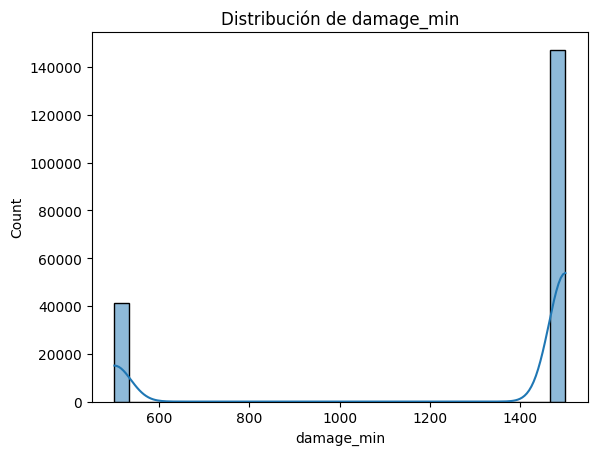

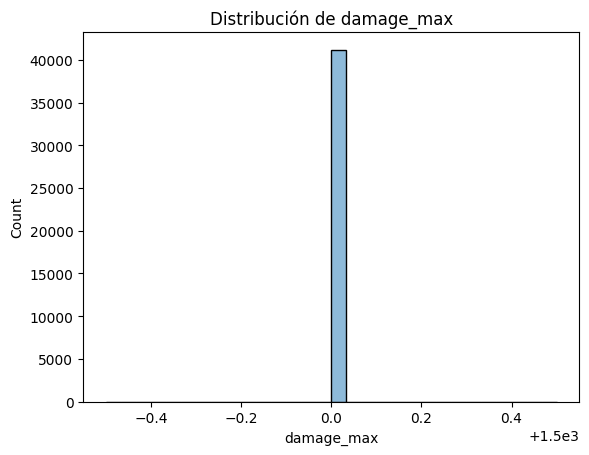

In [13]:

sns.histplot(df["damage_min"], bins=30, kde=True)
plt.title("Distribución de damage_min")
plt.show()

sns.histplot(df["damage_max"], bins=30, kde=True)
plt.title("Distribución de damage_max")
plt.show()


In [ ]:

mode_damage_min = df['damage_min'].mode()[0]
df['damage_min'] = df['damage_min'].fillna(mode_damage_min)


median_damage_max = df['damage_max'].median()
df['damage_max'] = df['damage_max'].fillna(median_damage_max)


df.isnull().sum()


id                               0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
crash_year                       0
crash_day_of_month               0
damage_min                       0
damage_max                       0
dtype: int64

In [16]:
load_dotenv()

engine = create_engine(f"mysql+pymysql://{USER}:{PASSWORD}@{HOST}/{DATABASE}")

df.to_sql("accidents_clean", con=engine, if_exists="replace", index=False)

print("Datos limpios guardados en la base de datos accidents_clean")

Datos limpios guardados en la base de datos accidents_clean
